In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
import pandas as pd
import random
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
import numpy as np
from sklearn.utils.multiclass import unique_labels
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from tensorflow.keras.applications import VGG19 #For Transfer Learning
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam
from keras.models import Model

In [3]:
epochs = 10

In [4]:
x = np.load('/content/drive/MyDrive/Datasets/fold2/images.npy')
y = np.load('/content/drive/MyDrive/Datasets/fold2/types.npy')


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state= 1)

In [6]:
x_train1, x_train2, y_train1, y_train2= train_test_split(x_train,y_train, test_size=.5, random_state=1)

In [7]:
print((x_test.shape, y_test.shape))

print((x_train1.shape, y_train1.shape))
print((x_train2.shape, y_train2.shape))

((253, 256, 256, 3), (253,))
((1135, 256, 256, 3), (1135,))
((1135, 256, 256, 3), (1135,))


In [8]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [9]:
#encoding y_test

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_test)
print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

y_test = onehot_encoded

[ 8  5  5  8 16  5  3 10  3  3  3  3  3  3 16  0  5  3  3  3  7  3  0  6
 16  5  3  7  3  5 15  3  2  3  3  3  8  7 15 12  7  5  1 17 17  7  3  3
 13 17  5  5  5  0  5  5  2  0  6 12  5  9  4 10  0  0 15  6  5  0 10  1
  6  5  3  5  3  7 16  3 15  6  1  3  4  3  3 10  5 10  3  5  0  5 18  1
  3  5 14  8  0  0 14  3  3  5 15  2 12  3  5 14  0  3  4  3  2 16  7  3
  5  3  9  3  5  0  6 14  5  9  1  3  2  3  3  3  8  3  3  5  1  6  3  3
 11  3  3  3  3  3  5  4  3  5  8  1  0  0 17 13  0 17  3  5 10 10  7  5
  4 12 10  5  3  2  1 13  5  3  5 13  3 17  3  3  5  8  4  8 16 14  5  0
  0  3  0  5  4  1  5  5  5  3  3  3 14 15  9  1  1  3 16  3  3  3 14  3
  7  3  1 12  5  1  3 15  5 16  3  5 14  7  3 16  3  3 10  5  0 12  3 15
 12  5  3  4  3 17 10  3 11  8 14  7  0]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [10]:
## encoding y_train1
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_train1)
print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

y_train1 = onehot_encoded

[ 5  6  3 ...  3 17  5]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
## encoding y_train2
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_train2)
print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

y_train2 = onehot_encoded

[ 4  8  3 ...  3 16  5]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
print((x_test.shape, y_test.shape))

print((x_train1.shape, y_train1.shape))
print((x_train2.shape, y_train2.shape))

((253, 256, 256, 3), (253, 19))
((1135, 256, 256, 3), (1135, 19))
((1135, 256, 256, 3), (1135, 19))


In [13]:
# y_test = to_categorical(y_test)
# y_train1 = to_categorical(y_train1)
# y_train2 = to_categorical(y_train2)

In [14]:
# print((x_test.shape, y_test.shape))

# print((x_train1.shape, y_train1.shape))
# print((x_train2.shape, y_train2.shape))

In [15]:
train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1 )

In [16]:
train_generator.fit(x_train1)

In [17]:
test_generator = ImageDataGenerator(rotation_range=2,  horizontal_flip= True, zoom_range=.1)

In [18]:
test_generator.fit(x_test)

In [19]:
#Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01,  patience=3, min_lr=1e-5)

In [20]:
#Initializing ResNet50
from tensorflow.keras.applications import ResNet50
base_model_resnet = ResNet50(include_top = False, weights = 'imagenet', input_shape = (256,256,3), classes = y_train1.shape[1])

94781440/94765736 [==============================] - 0s 0us/step


In [21]:
#Adding layers to the ResNet50
model_resnet=Sequential()
#Add the Dense layers along with activation and batch normalization
model_resnet.add(base_model_resnet)
model_resnet.add(Flatten())
#Add the Dense layers along with activation and batch normalization
model_resnet.add(Dense(1024,activation=('relu'), input_dim=512))
model_resnet.add(Dense(512,activation=('relu'))) 
model_resnet.add(Dropout(.4))
model_resnet.add(Dense(256,activation=('relu'))) 
model_resnet.add(Dropout(.3))
model_resnet.add(Dense(128,activation=('relu')))
model_resnet.add(Dropout(.2))
model_resnet.add(Dense(19,activation=('softmax')))

#Summary of ResNet50 Model
model_resnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 1024)              134218752 
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [22]:
from tensorflow.keras.optimizers import SGD


In [23]:
model_resnet.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [24]:
#Training the ResNet50 model
rest_net_history = model_resnet.fit(x_train1,y_train1, epochs=10,validation_data = (x_test,y_test), verbose=1)

Epoch 1/10
36/36 [==============================] - 134s 4s/step - loss: 2.4919 - accuracy: 0.3789 - val_loss: 4.6134 - val_accuracy: 0.1621
Epoch 2/10
36/36 [==============================] - 120s 3s/step - loss: 1.6858 - accuracy: 0.5013 - val_loss: 5.4697 - val_accuracy: 0.1462
Epoch 3/10
36/36 [==============================] - 123s 3s/step - loss: 1.4415 - accuracy: 0.5639 - val_loss: 5.8792 - val_accuracy: 0.2095
Epoch 4/10
36/36 [==============================] - 128s 4s/step - loss: 1.2300 - accuracy: 0.6291 - val_loss: 5.7654 - val_accuracy: 0.1976
Epoch 5/10
36/36 [==============================] - 121s 3s/step - loss: 1.0256 - accuracy: 0.6978 - val_loss: 3.5917 - val_accuracy: 0.2609
Epoch 6/10
36/36 [==============================] - 122s 3s/step - loss: 0.7771 - accuracy: 0.7595 - val_loss: 1.5116 - val_accuracy: 0.5375
Epoch 7/10
36/36 [==============================] - 119s 3s/step - loss: 0.6478 - accuracy: 0.8070 - val_loss: 1.6541 - val_accuracy: 0.5573
Epoch 8/10
36

In [25]:
model_resnet.save('resNet50 epoch 10 fold2 x_train1.h5')

In [26]:
# from keras.callbacks import ReduceLROnPlateau
# lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01, patience=3, min_lr=1e-5)

**VGG19 using for folder 3**

In [27]:
# from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import VGG19

# define cnn model
def define_model():
	# load model
	model = VGG19(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False

	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True, rotation_range=2, zoom_range=.2)
	
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train2, y_train2, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test))

	# evaluate model
	_, acc = model.evaluate(x_train2, y_train2, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg19 fold2 10 epoch x_train2.h5')


run_test_harness()

80150528/80134624 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
9/9 [==============================] - 72s 8s/step - loss: 48.5227 - accuracy: 0.2335 - val_loss: 34.9887 - val_accuracy: 0.3913
Epoch 2/10
9/9 [==============================] - 69s 8s/step - loss: 15.4944 - accuracy: 0.5912 - val_loss: 22.4134 - val_accuracy: 0.3874
Epoch 3/10
9/9 [==============================] - 66s 7s/step - loss: 5.2107 - accuracy: 0.7885 - val_loss: 14.0097 - val_accuracy: 0.4941
Epoch 4/10
9/9 [==============================] - 66s 8s/step - loss: 1.5124 - accuracy: 0.9013 - val_loss: 11.4999 - val_accuracy: 0.4941
Epoch 5/10
9/9 [==============================] - 66s 8s/step - loss: 0.3533 - accuracy: 0.9604 - val_loss: 8.4525 - val_accuracy: 0.4664
Epoch 6/10
9/9 [==============================] - 65s 7s/step - loss: 0.1497 - accuracy: 0.9692 - val_loss: 7.5003 - val_accuracy: 0.4545
Epoch 7/10
9/9 [==============================] - 66s 7s/step - loss: 0.0963 - accuracy: 0.9744 - val_loss: 6.7667 - val_accuracy: 0.4585
Epoch 8/10
9/9 [============

**VGG16 using for folder 3**

In [28]:
# from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import VGG16

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False

	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True,zoom_range=.1)
	
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train1, y_train1, epochs=10, verbose=1, validation_data = (x_test, y_test))
	# evaluate model
	_, acc = model.evaluate(x_train1, y_train1, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg16 fold2 10 epoch y_train1.h5')


run_test_harness()

58900480/58889256 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
36/36 [==============================] - 57s 2s/step - loss: 13.5096 - accuracy: 0.2881 - val_loss: 2.5643 - val_accuracy: 0.1581
Epoch 2/10
36/36 [==============================] - 57s 2s/step - loss: 1.8714 - accuracy: 0.4634 - val_loss: 2.9297 - val_accuracy: 0.4150
Epoch 3/10
36/36 [==============================] - 57s 2s/step - loss: 1.3051 - accuracy: 0.5894 - val_loss: 2.5331 - val_accuracy: 0.4229
Epoch 4/10
36/36 [==============================] - 56s 2s/step - loss: 1.0123 - accuracy: 0.6758 - val_loss: 3.0296 - val_accuracy: 0.4704
Epoch 5/10
36/36 [==============================] - 57s 2s/step - loss: 0.8810 - accuracy: 0.7269 - val_loss: 2.9309 - val_accuracy: 0.4427
Epoch 6/10
36/36 [==============================] - 57s 2s/step - loss: 0.7834 - accuracy: 0.7718 - val_loss: 3.6220 - val_accuracy: 0.4585
Epoch 7/10
36/36 [==============================] - 57s 2s/step - loss: 0.7321 - accuracy: 0.7903 - val_loss: 3.1740 - val_accuracy: 0.4704
Epoch 8/10
36/36 [=

**Sequential model1 using for folder3**

In [29]:
# #Model 1

# #Defining the Convolutional Neural Network
# model1 = Sequential()

# model1.add(Conv2D(32, (3, 3), input_shape = (256,256,3), activation='relu'))
# model1.add(MaxPooling2D(pool_size = (2, 2)))
# model1.add(Dropout(0.2))

# model1.add(Conv2D(64, (3, 3), activation='relu'))
# model1.add(MaxPooling2D(pool_size = (2, 2)))
# model1.add(Dropout(0.2))

# model1.add(Conv2D(128, (3, 3), activation='relu'))
# model1.add(MaxPooling2D(pool_size = (2, 2)))
# model1.add(Dropout(0.2))

# model1.add(Flatten())

# model1.add(Dense(128, activation = 'relu'))
# model1.add(Dense(19, activation = 'softmax'))


# #If your targets are one-hot encoded, use categorical_crossentropy. Examples of one-hot encodings:
# # If your targets are integers, use sparse_categorical_crossentropy. 

# #model1.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['acc'])
# model1.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
# #model1.summary()

# #Training the CNN model1
# #history = model1.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
# history1 = model1.fit(x_train1, y_train1, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test))

# model1.save('model 1 fold2 epoch 10.hdf5')

**Sequential model2 using for folder 3**

In [30]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape = (256,256,3), activation='relu'))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(Conv2D(25, (1,1)))

model2.add(Flatten())

model2.add(Dense(19, activation = 'softmax'))

model2.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
#model2.summary()

history2 = model2.fit(x_train1, y_train1, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test))

model2.save('model2 fold2 epoch 10.hdf5')

Epoch 1/10
9/9 [==============================] - 70s 8s/step - loss: 133.7883 - acc: 0.1004 - val_loss: 28.7764 - val_acc: 0.0277
Epoch 2/10
9/9 [==============================] - 69s 8s/step - loss: 35.8059 - acc: 0.1154 - val_loss: 25.1646 - val_acc: 0.2925
Epoch 3/10
9/9 [==============================] - 68s 8s/step - loss: 17.1921 - acc: 0.1207 - val_loss: 7.3789 - val_acc: 0.0632
Epoch 4/10
9/9 [==============================] - 68s 8s/step - loss: 4.7847 - acc: 0.1700 - val_loss: 3.3879 - val_acc: 0.3281
Epoch 5/10
9/9 [==============================] - 68s 8s/step - loss: 2.9370 - acc: 0.3427 - val_loss: 3.0515 - val_acc: 0.2688
Epoch 6/10
9/9 [==============================] - 70s 8s/step - loss: 2.5244 - acc: 0.3515 - val_loss: 2.5481 - val_acc: 0.3518
Epoch 7/10
9/9 [==============================] - 69s 8s/step - loss: 2.2877 - acc: 0.4194 - val_loss: 2.3531 - val_acc: 0.3715
Epoch 8/10
9/9 [==============================] - 69s 8s/step - loss: 2.1526 - acc: 0.4247 - val_l

**Sequential Model3 for fold 3**

In [31]:
# #Model 3
# #
# model3 = Sequential()

# model3.add(Conv2D(32, (3, 3), input_shape = (256,256,3), activation='relu'))
# model3.add(MaxPooling2D(pool_size = (2, 2)))
# model3.add(Dropout(0.2))

# model3.add(Conv2D(64, (3, 3), activation='relu'))
# model3.add(MaxPooling2D(pool_size = (2, 2)))
# model3.add(Dropout(0.2))

# model3.add(Flatten())

# model3.add(Dense(19, activation = 'softmax'))

# #If your targets are one-hot encoded, use categorical_crossentropy. Examples of one-hot encodings:
# # If your targets are integers, use sparse_categorical_crossentropy. 

# #model1.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['acc'])
# model3.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
# #model3.summary()

# #Training the CNN model1
# #history = model1.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
# history3 = model3.fit(x_train2, y_train2, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test))

# model3.save('model3 fold3 epoch 10.hdf5')


**Ensembling all the three models (VGG16, Vgg19, RestNet50)**


In [32]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

In [35]:
model1 = load_model('resNet50 epoch 10 fold2 x_train1.h5')
model2 = load_model('vgg19 fold2 10 epoch x_train2.h5')
model3 = load_model('vgg16 fold2 10 epoch y_train1.h5')


In [36]:
models = [model1, model2, model3] 


In [37]:
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)



In [38]:
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = model1.predict(x_test)
prediction2 = model2.predict(x_test)
prediction3 = model3.predict(x_test)


In [39]:
accuracy1 = accuracy_score(np.argmax(y_test, axis=1), np.argmax(prediction1, axis=1))
accuracy2 = accuracy_score(np.argmax(y_test, axis=1), np.argmax(prediction2, axis=1))
accuracy3 = accuracy_score(np.argmax(y_test, axis=1), np.argmax(prediction3, axis=1))


ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)

print('Accuracy Score for average ensemble = ', ensemble_accuracy)

Accuracy Score for model1 =  0.5217391304347826
Accuracy Score for model2 =  0.4743083003952569
Accuracy Score for model3 =  0.45849802371541504
Accuracy Score for average ensemble =  0.5454545454545454


In [40]:
#Weighted average ensemble
models = [model1, model2,model3] 
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [.5, .25,.25] #########this should be filled  

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis= 1), weighted_ensemble_prediction)

In [41]:
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)

print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

Accuracy Score for model1 =  0.5217391304347826
Accuracy Score for model2 =  0.4743083003952569
Accuracy Score for model3 =  0.45849802371541504
Accuracy Score for average ensemble =  0.5454545454545454
Accuracy Score for weighted average ensemble =  0.5731225296442688


In [42]:
### Explore metrics for the ideal weighted ensemble model. 
import matplotlib.pyplot as plt

models = [model1, model2,model3] 
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
ideal_weights = [.5, .25,.25] 

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(np.argmax(y_test, axis= 1), ideal_weighted_ensemble_prediction)


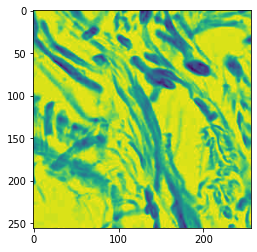

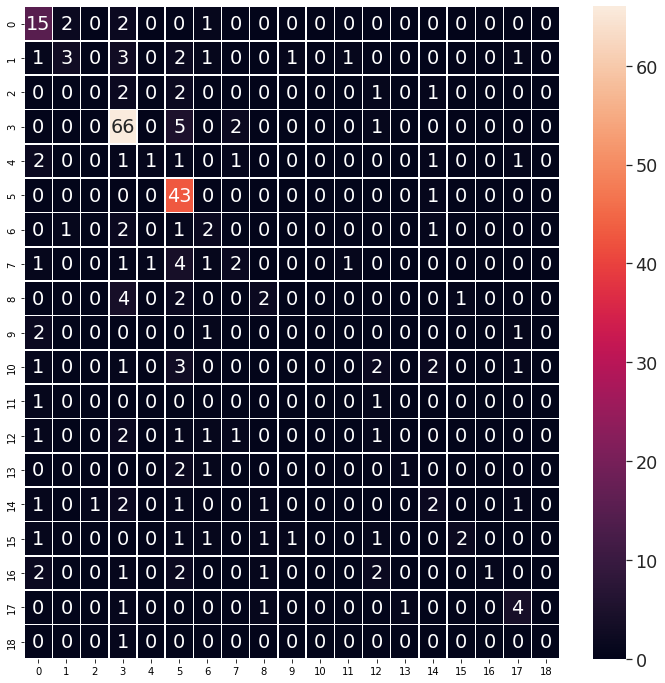

In [43]:
i = random.randint(1,len(ideal_weighted_ensemble_prediction))
plt.imshow(x_test[i,:,:,0]) 
# print("Predicted Label: ", class_names[int(ideal_weighted_ensemble_prediction[i])])
# print("True Label: ", class_names[int(y_test[i])])

from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis= 1), ideal_weighted_ensemble_prediction)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)



**Ensembling model 1 and model 2**

In [44]:
model12 = [model1, model2]


In [45]:
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)



In [46]:
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = model1.predict(x_test)
prediction2 = model2.predict(x_test)


In [47]:
accuracy1 = accuracy_score(np.argmax(y_test, axis=1), np.argmax(prediction1, axis=1))
accuracy2 = accuracy_score(np.argmax(y_test, axis=1), np.argmax(prediction2, axis=1))
ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

Accuracy Score for model1 =  0.5217391304347826
Accuracy Score for model2 =  0.4743083003952569
Accuracy Score for average ensemble =  0.5454545454545454


In [48]:
#Weighted average ensemble
models = [model1, model2] 
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [.7,.3] #########this should be filled  

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis= 1), weighted_ensemble_prediction)

In [49]:
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)


print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

Accuracy Score for model1 =  0.5217391304347826
Accuracy Score for model2 =  0.4743083003952569
Accuracy Score for average ensemble =  0.5454545454545454
Accuracy Score for weighted average ensemble =  0.5454545454545454


In [50]:
### Explore metrics for the ideal weighted ensemble model. 
import matplotlib.pyplot as plt

models = [model1, model2] 
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
ideal_weights = [.7,.3] 

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(np.argmax(y_test, axis= 1), ideal_weighted_ensemble_prediction)


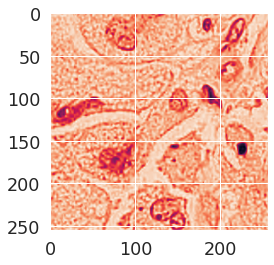

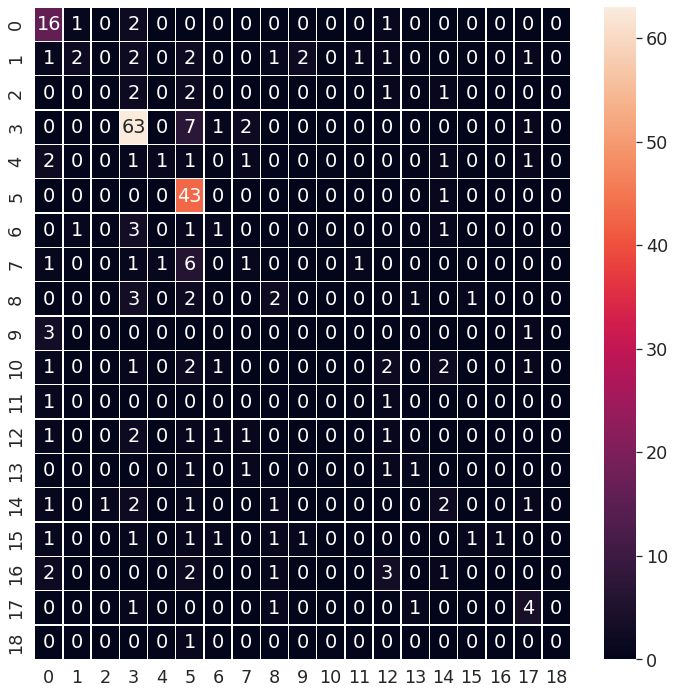

In [51]:
i = random.randint(1,len(ideal_weighted_ensemble_prediction))
plt.imshow(x_test[i,:,:,0]) 
# print("Predicted Label: ", class_names[int(ideal_weighted_ensemble_prediction[i])])
# print("True Label: ", class_names[int(y_test[i])])

from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis= 1), ideal_weighted_ensemble_prediction)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)



**Ensembling model 2 and model 3**

In [52]:
model23 = [model2, model3]

In [53]:
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

In [54]:
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = model1.predict(x_test)
prediction2 = model2.predict(x_test)


In [55]:
accuracy1 = accuracy_score(np.argmax(y_test, axis=1), np.argmax(prediction1, axis=1))
accuracy2 = accuracy_score(np.argmax(y_test, axis=1), np.argmax(prediction2, axis=1))
ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), ensemble_prediction)

print('Accuracy Score for model2 = ', accuracy1)
print('Accuracy Score for model3 = ', accuracy2)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

Accuracy Score for model2 =  0.5217391304347826
Accuracy Score for model3 =  0.4743083003952569
Accuracy Score for average ensemble =  0.525691699604743


In [56]:
#Weighted average ensemble
models = [model2, model3] 
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [.5,.5] #########this should be filled  

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis= 1), weighted_ensemble_prediction)

In [57]:
print('Accuracy Score for model2 = ', accuracy1)
print('Accuracy Score for model3 = ', accuracy2)


print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

Accuracy Score for model2 =  0.5217391304347826
Accuracy Score for model3 =  0.4743083003952569
Accuracy Score for average ensemble =  0.525691699604743
Accuracy Score for weighted average ensemble =  0.4980237154150198


In [58]:
### Explore metrics for the ideal weighted ensemble model. 
import matplotlib.pyplot as plt

models = [model1, model2] 
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
ideal_weights = [.5,.5] 

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(np.argmax(y_test, axis= 1), ideal_weighted_ensemble_prediction)


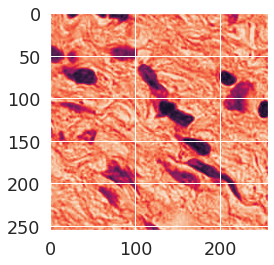

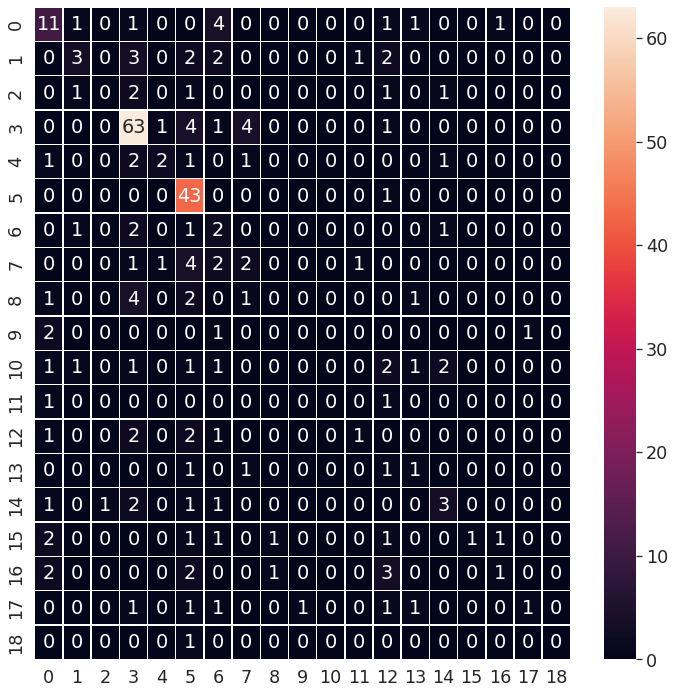

In [59]:
i = random.randint(1,len(ideal_weighted_ensemble_prediction))
plt.imshow(x_test[i,:,:,0]) 
# print("Predicted Label: ", class_names[int(ideal_weighted_ensemble_prediction[i])])
# print("True Label: ", class_names[int(y_test[i])])

from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis= 1), ideal_weighted_ensemble_prediction)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

